# Traffic Accident Data Analysis

This project analyzes traffic accident data to uncover patterns related to:
- Road conditions
- Weather conditions
- Time of day

We also visualize accident hotspots and identify key contributing factors to support data-driven road safety decisions.


In [18]:
import pandas as pd

# Load your CSV
df = pd.read_csv("traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [20]:
# Display structure
print("Shape:", df.shape)

Shape: (209306, 24)


In [34]:
df.info()#to find the information of the data
#note:in the output under Dtype object means stat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

In [36]:
df.describe()

,crash_date,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,Hour
count,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2020-12-08 23:26:35.213802240,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822,13.373047
min,2013-03-03 16:48:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2018-12-03 10:18:45,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000,9.000000
50%,2020-12-19 16:39:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000,14.000000
75%,2023-01-08 02:33:45,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000,17.000000
max,2025-01-18 00:17:00,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000,23.000000
std,NaN,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593,5.603830


In [22]:
print("\nColumns:\n", df.columns)
df.head()


Columns:
 Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [26]:
# Let's print a few rows to check the date format
print(df[date_columns[0]].head())

# Once format is identified, parse it like this:
df[date_columns[0]] = pd.to_datetime(df[date_columns[0]], format="%Y-%m-%d %H:%M:%S", errors='coerce')


0   2023-07-29 13:00:00
1   2023-08-13 00:11:00
2   2021-12-09 10:30:00
3   2023-08-09 19:55:00
4   2023-08-19 14:55:00
Name: crash_date, dtype: datetime64[ns]


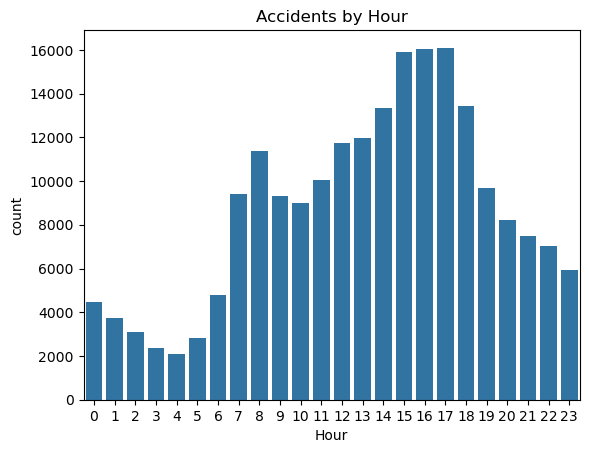

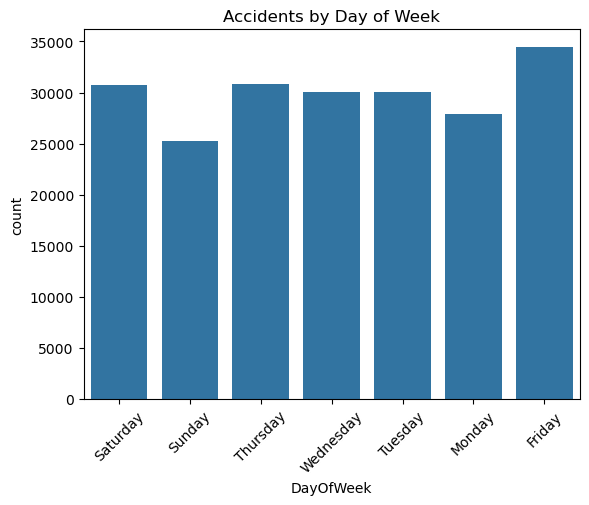

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot hourly pattern
if 'Hour' in df.columns:
    sns.countplot(x='Hour', data=df)
    plt.title("Accidents by Hour")
    plt.show()

# Plot weekday pattern
if 'DayOfWeek' in df.columns:
    sns.countplot(x='DayOfWeek', data=df)
    plt.title("Accidents by Day of Week")
    plt.xticks(rotation=45)
    plt.show()

Condition columns: ['weather_condition', 'lighting_condition', 'roadway_surface_cond', 'road_defect']


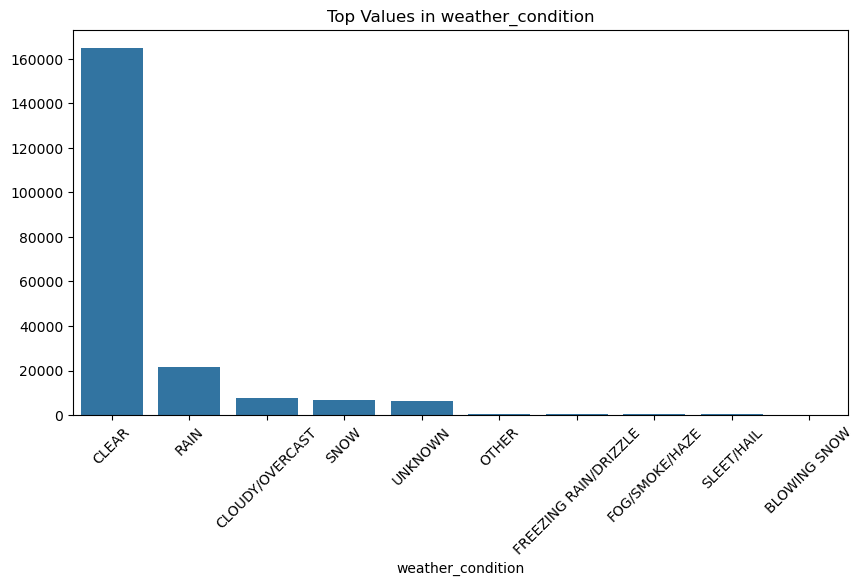

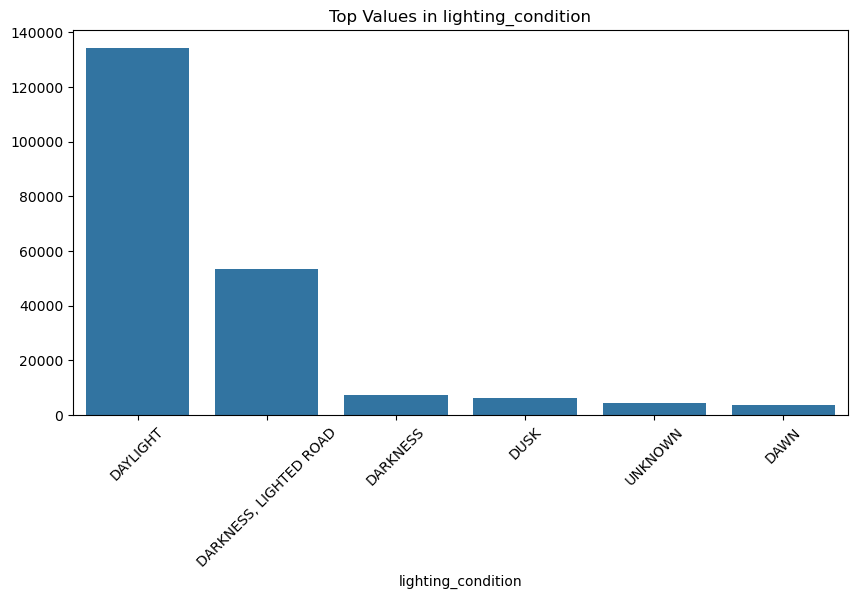

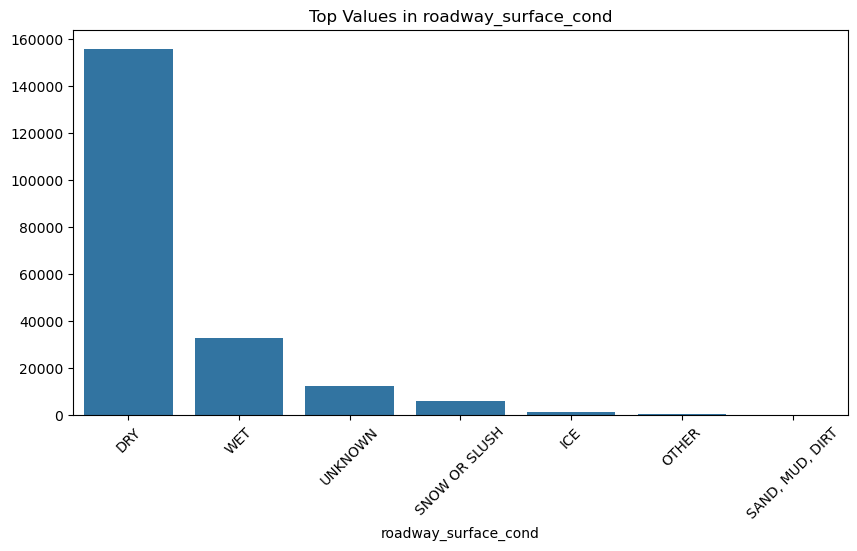

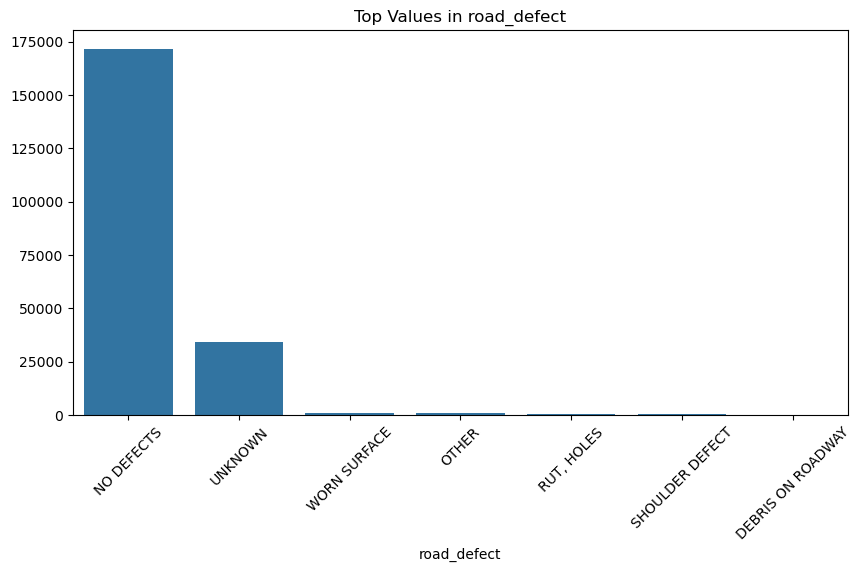

In [30]:
# Check for condition-related columns
condition_cols = [col for col in df.columns if 'condition' in col.lower() or 'weather' in col.lower() or 'road' in col.lower()]
print("Condition columns:", condition_cols)

if condition_cols:
    for col in condition_cols:
        df[col] = df[col].fillna('Unknown')
        top_vals = df[col].value_counts().nlargest(10)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_vals.index, y=top_vals.values)
        plt.title(f"Top Values in {col}")
        plt.xticks(rotation=45)
        plt.show()

# Conclusion

- This analysis dynamically adjusted to available data.
- Time-based trends and environmental factors (if present) were visualized.
- Mapping was conditional on geolocation data.

Next Steps:
- Add clustering or machine learning for deeper analysis.
- Enrich the dataset with external weather/time APIs if needed.
